In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.axis('off')

#!cp /cellar/users/btsui/Downloads/Thesaurus.txt . 

###

objective: map the srs freetext to NCIT

copied from 
https://evs.nci.nih.gov/ftp1/NCI_Thesaurus/ReadMe.txt: 


" 
If a "parents", "synonyms", "display name", or "concept status" field contains multiple entries, these are pipe-delimited.
For root concepts without "parents", this field contains the string "root_node".  The
first entry in the "synonyms" field is the preferred name of the concept.  If no preferred
name has been stated for the concept, this field contains the concept name.  The "definition"
field contains only one definition if more than one definition is associated with the concept;
not all concepts contain definitions.  A "display_name" or "concept status" may contain zero values.
The "semantic type" field is guaranteed to contain one or more values.
"


First in synonym is the official name used on the NCIT website. 

Thesaurus.txt is pulled from  https://evs.nci.nih.gov/ftp1/NCI_Thesaurus/ReadMe.txt

In [49]:
import pandas as pd
import seaborn as sns
sns.set_style('white')


In [6]:
ncitT=pd.read_csv('Thesaurus.txt',sep='\t',header=None)

In [20]:
#'code <tab> concept name <tab> parents <tab> synonyms <tab> definition <tab> display name <tab> concept status <tab> semantic type <EOL>'.split('<tab>')

In [21]:
col=['code',
 'concept name',
 'parents',
 'synonyms',
 'definition',
 'display name',
 'concept status',
 'semantic type']
ncitT.columns=col

###

is any of the code re

In [22]:
ncitT['concept name'].values[:10]

array(['<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100000>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100001>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100002>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100003>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100004>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100005>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100006>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100007>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100008>',
       '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100009>'],
      dtype=object)

In [69]:
ignoreConceptStatus=['Retired_Concept', 'Obsolete_Concept', 'Header_Concept',
       'Provisional_Concept', 'Header_Concept|Retired_Concept',
       'Header_Concept|Obsolete_Concept']
m_concept=~ncitT['concept status'].isin(ignoreConceptStatus)
m=m_concept
ncitSubDf=ncitT[m]

In [81]:
#ncitT[ncitT['display name']=='Heart']

In [91]:
myIndexOrder=['code','concept name','parents','definition','semantic type']
tmpS=ncitSubDf.set_index(myIndexOrder)['synonyms']

In [92]:
tmpS2=tmpS.str.split('|',expand=True).stack()

In [93]:
tmpDf=tmpS2.to_frame()

In [106]:
tmpDf.index.names=myIndexOrder+['n_th synonym']

In [107]:
tmpDf.columns=['synonyms']

In [113]:
tmpDf.to_pickle('./Data/NCIT_table.pickle')

median len of synonyms: 20.0


Text(0.5,0,'synonym length')

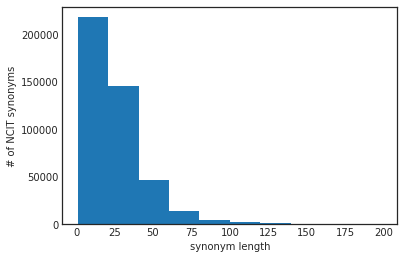

In [109]:
ax=tmpDf['synonyms'].str.len()[tmpDf['synonyms'].str.len()<200].hist()
print ("median len of synonyms:",tmpDf['synonyms'].str.len().median())
ax.set_ylabel('# of NCIT synonyms')
ax.grid(False)

ax.set_xlabel('synonym length')

In [28]:
ncitT.head(n=10)

,code,concept name,parents,synonyms,definition,display name,concept status,semantic type
0,C100000,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C49803,Percutaneous Coronary Intervention for ST Elev...,A percutaneous coronary intervention is necess...,NaN,NaN,Therapeutic or Preventive Procedure
1,C100001,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C49803,Percutaneous Coronary Intervention for ST Elev...,A percutaneous coronary intervention is necess...,NaN,NaN,Therapeutic or Preventive Procedure
2,C100002,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C49803,Percutaneous Coronary Intervention for ST Elev...,A percutaneous coronary intervention is necess...,NaN,NaN,Therapeutic or Preventive Procedure
3,C100003,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C80449,Percutaneous Mitral Valve Repair|PERCUTANEOUS ...,Invasive procedure through a puncture in the s...,NaN,NaN,Therapeutic or Preventive Procedure
4,C100004,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C80430,Pericardial Stripping|PERICARDIAL STRIPPING,Removal or resection of the pericardium. (ACC),NaN,NaN,Therapeutic or Preventive Procedure
5,C100005,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C15839,Post-Cardiac Transplant Evaluation|POST-CARDIA...,A procedure to evaluate the health of the an i...,NaN,NaN,Health Care Activity
6,C100006,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C139982,Pre-Operative Evaluation for Non-Cardiovascula...,A procedure to evaluate the health of the card...,NaN,NaN,Health Care Activity
7,C100007,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C99896,Previously Implanted Cardiac Lead|PREVIOUSLY I...,The coronary sinus / left ventricular lead was...,NaN,NaN,Finding
8,C100008,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C49803,Rescue Percutaneous Coronary Intervention for ...,A percutaneous coronary intervention is impera...,NaN,NaN,Therapeutic or Preventive Procedure
9,C100009,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesauru...,C99896,Reused Cardiac Lead,The cardiac lead has been left in situ and reu...,NaN,NaN,Finding


In [27]:
ncitT.head(n=10).to_csv('tmp.tsv',sep='\t')

In [1]:
!pwd

/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/NLP_spacy
